In [32]:
import pandas_datareader.data as web
import akshare as ak

In [37]:
def get_china_stock_name(stock_code):
    """ 根据 A 股股票代码查询股票名称 """
    stock_info = ak.stock_info_a_code_name()  # 获取 A 股所有股票代码和名称
    stock_dict = dict(zip(stock_info["code"], stock_info["name"]))  # 转换为字典
    return stock_dict.get(stock_code, "股票代码不存在")


In [39]:
#import pandas_datareader.data as web
#import datetime
#start = datetime.datetime(2000, 1, 1)
#end = datetime.datetime(2021, 9, 1)
#df = web.DataReader('GOOGL', 'stooq', start, end)
#print(df)

#import datetime
#start = datetime.datetime(2021,1,1)
#end = datetime.datetime(2025,1,20)

# 根据股票代码获取股票名称
stock_code = "002001"  # 三花智控的股票代码
print("********",get_china_stock_name(stock_code)) 

# 获取某只股票的历史数据
df = ak.stock_zh_a_hist(symbol=stock_code, period="daily", start_date="20100101", end_date="20250207", adjust="")
df.set_index("日期", inplace=True)
df.drop(columns="股票代码", inplace=True)
df.drop(columns="振幅", inplace=True)
df.drop(columns="涨跌幅", inplace=True)
df.drop(columns="换手率", inplace=True)
df.drop(columns="涨跌额", inplace=True)
df.drop(columns="成交额", inplace=True)
print(df)
print(len(df))

******** 新 和 成
               开盘     收盘     最高     最低     成交量
日期                                            
2010-01-04  48.88  47.30  49.08  47.25   23503
2010-01-05  47.35  46.65  47.76  46.50   34171
2010-01-06  46.65  46.84  47.51  46.60   31856
2010-01-07  46.79  45.85  46.89  45.80   18728
2010-01-08  45.85  46.69  47.40  45.85   30160
...           ...    ...    ...    ...     ...
2025-01-24  22.32  22.49  22.54  22.30  180246
2025-01-27  22.49  22.51  22.78  22.41  196691
2025-02-05  22.53  22.27  22.62  22.01  219411
2025-02-06  22.28  22.32  22.38  22.08  185259
2025-02-07  22.30  22.37  22.50  22.14  247629

[3640 rows x 5 columns]
3640


In [40]:
print(df.tail(10))

               开盘     收盘     最高     最低     成交量
日期                                            
2025-01-17  21.55  21.90  22.02  21.35  209450
2025-01-20  21.97  22.12  22.44  21.96  224625
2025-01-21  22.13  22.06  22.20  21.64  205411
2025-01-22  22.34  22.48  22.64  22.14  413706
2025-01-23  22.60  22.40  22.74  22.29  274907
2025-01-24  22.32  22.49  22.54  22.30  180246
2025-01-27  22.49  22.51  22.78  22.41  196691
2025-02-05  22.53  22.27  22.62  22.01  219411
2025-02-06  22.28  22.32  22.38  22.08  185259
2025-02-07  22.30  22.37  22.50  22.14  247629


In [76]:
#pre_days = 10

def Stock_Price_LSTM_Data_Precesing(df,mem_his_days,pre_days):
    df.dropna(inplace=True)
    df.sort_index(inplace=True)

    #df['日期'] = pd.to_datetime(df['日期']).astype(str)

    df['预测'] = df['收盘'].shift(-pre_days)
    from sklearn.preprocessing import StandardScaler
    scaler=StandardScaler()
    sca_X=scaler.fit_transform(df.iloc[:,:-1])
    print("-------sca_X:",len(sca_X))
    
    #mem_his_days = 10
    from collections import deque
    deq = deque(maxlen = mem_his_days)
    
    X = []
    for i in sca_X:
        deq.append(list(i))
        if len(deq) == mem_his_days:
            X.append(list(deq))
    #最后pre_days条记录
    X_lately = X[-pre_days:]
    print("X_lately:",len(X_lately))
    #删除pre_days记录
    X = X[:-pre_days]
    print("X:",len(X))

    #预测价格数组例
    y =df['预测'].values[mem_his_days-1:-pre_days]
    print("y:",len(y))
    import numpy as np
    X =np.array(X)
    y =np.array(y)
    return X,y,X_lately

In [77]:
X,y,X_lately=Stock_Price_LSTM_Data_Precesing(df,5,10)

-------sca_X: 3490
X_lately: 10
X: 3476
y: 3476


In [65]:
print(len(X),X)
print('=============================================')
print(len(y),y)
print('=============================================')
print(len(X_lately),X_lately)
print('=============================================')
print(df)

3536 [[[ 3.4289147   3.21360176  3.32233317  3.33965866 -1.02476156]
  [ 3.22674119  3.12783321  3.15200612  3.23824795 -0.94419948]
  [ 3.13424351  3.15290402  3.1197472   3.25176938 -0.96168179]
  [ 3.15274305  3.02227191  3.0397451   3.14359795 -1.06082117]
  [ 3.02853188  3.13311127  3.10555328  3.15035867 -0.97448956]]

 [[ 3.22674119  3.12783321  3.15200612  3.23824795 -0.94419948]
  [ 3.13424351  3.15290402  3.1197472   3.25176938 -0.96168179]
  [ 3.15274305  3.02227191  3.0397451   3.14359795 -1.06082117]
  [ 3.02853188  3.13311127  3.10555328  3.15035867 -0.97448956]
  [ 3.22277701  3.12123563  3.16749039  3.22472652 -1.00087537]]

 [[ 3.13424351  3.15290402  3.1197472   3.25176938 -0.96168179]
  [ 3.15274305  3.02227191  3.0397451   3.14359795 -1.06082117]
  [ 3.02853188  3.13311127  3.10555328  3.15035867 -0.97448956]
  [ 3.22277701  3.12123563  3.16749039  3.22472652 -1.00087537]
  [ 3.12763654  3.43264145  3.33136567  3.25176938 -0.83716852]]

 ...

 [[-0.45598788 -0.48896

In [84]:
pre_days = 10
# mem_days = [5,10,15]
# lstm_layers = [1,2,3]
# dense_layers = [1,2,3]
# units = [16,32]
mem_days = [5]
lstm_layers = [1]
dense_layers = [1]
units = [32]
from tensorflow.keras.callbacks import ModelCheckpoint
for the_mem_days in mem_days:
    for the_lstm_layers in lstm_layers:
        for the_dense_layers in dense_layers:
            for the_units in units:
                filepath = './models/{val_mape:.2f}_{epoch:02d}_'+f'men_{the_mem_days}_lstm_{the_lstm_layers}_dense_{the_dense_layers}_unit_{the_units}.keras'
                checkpoint = ModelCheckpoint(
                    filepath=filepath,
                    save_weights_only=False,
                    monitor='val_mape',
                    mode='min',
                    save_best_only=True)

                X,y,X_lately = Stock_Price_LSTM_Data_Precesing(df,the_mem_days,pre_days)
                from sklearn.model_selection import train_test_split
                X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=False,test_size=0.1)

                #构建LSTM模型
                import tensorflow as tf
                from tensorflow.keras.models import Sequential
                from tensorflow.keras.layers import Input,LSTM, Dense, Dropout
                model = Sequential()
                model.add(Input(shape=X.shape[1:]))  # ✅ 这里先加 Input 层
                #model.add(LSTM(the_units,input_shape=X.shape[1:],activation='relu',return_sequences=True))
                model.add(LSTM(the_units, activation='relu', return_sequences=True))
                model.add(Dropout(0.1))
                
                for i in range(the_lstm_layers):
                    model.add(LSTM(the_units,activation='relu',return_sequences=True))
                    model.add(Dropout(0.1))

                model.add(LSTM(the_units,activation='relu'))
                model.add(Dropout(0.1))

                for i in range(the_dense_layers):
                    model.add(Dense(the_units,activation='relu'))
                    model.add(Dropout(0.1))

                model.add(Dense(1))

                model.compile(optimizer='adam',
                             loss='mse',
                             metrics=['mape'])

                model.fit(X_train,y_train,batch_size=32,epochs=50,validation_data=(X_test,y_test),callbacks=[checkpoint])

-------sca_X: 3470
X_lately: 10
X: 3456
y: 3456
Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 515.6301 - mape: 89.0584 - val_loss: 13.1371 - val_mape: 16.4833
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 33.1066 - mape: 19.2078 - val_loss: 1.8178 - val_mape: 5.9367
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 23.7154 - mape: 15.1536 - val_loss: 2.8705 - val_mape: 8.3590
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 17.9429 - mape: 13.3748 - val_loss: 0.6495 - val_mape: 3.6694
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 16.7617 - mape: 12.5387 - val_loss: 0.6955 - val_mape: 3.8508
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 16.9877 - mape: 12.7947 - val_loss: 0.6927 - val_mape: 3.7232
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 17.3303 - mape: 12.7801 - val_loss: 1.0392 - val_mape: 4.9948
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 16.0266 - mape: 12.3487 - val_loss: 0.7517 - val_m

In [85]:
print(df.tail(10))

               开盘     收盘     最高     最低     成交量  预测
日期                                                
2024-05-13  19.98  19.86  20.04  19.62  257075 NaN
2024-05-14  19.86  20.50  20.70  19.77  441096 NaN
2024-05-15  20.35  20.25  20.70  20.15  233722 NaN
2024-05-16  20.24  19.91  20.36  19.80  233274 NaN
2024-05-17  19.85  19.82  19.94  19.43  271676 NaN
2024-05-20  19.78  19.87  19.98  19.58  180775 NaN
2024-05-21  19.80  19.94  20.14  19.80  153618 NaN
2024-05-22  19.95  19.66  20.00  19.57  216201 NaN
2024-05-23  19.73  19.52  19.80  19.44  143053 NaN
2024-05-24  19.48  19.33  19.64  19.27  140093 NaN


In [86]:
from tensorflow.keras.models import load_model
best_model = load_model('./models/3.51_24_men_5_lstm_1_dense_1_unit_32.keras')

In [87]:
best_model.summary()
best_model.evaluate(X_test,y_test)
pre = best_model.predict(X_test)
print(len(pre))

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 5, 32)          │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 5, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 5, 32)          │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 5, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,781 (264.77 KB)

 Trainable params: 22,593 (88.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 45,188 (176.52 KB)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5261 - mape: 3.3864  
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step 
346


In [88]:
model.evaluate(X_test,y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7641 - mape: 3.8457 


[0.7637622952461243, 3.8125016689300537]

               开盘     收盘     最高     最低     成交量  预测
日期                                                
2024-05-13  19.98  19.86  20.04  19.62  257075 NaN
2024-05-14  19.86  20.50  20.70  19.77  441096 NaN
2024-05-15  20.35  20.25  20.70  20.15  233722 NaN
2024-05-16  20.24  19.91  20.36  19.80  233274 NaN
2024-05-17  19.85  19.82  19.94  19.43  271676 NaN
2024-05-20  19.78  19.87  19.98  19.58  180775 NaN
2024-05-21  19.80  19.94  20.14  19.80  153618 NaN
2024-05-22  19.95  19.66  20.00  19.57  216201 NaN
2024-05-23  19.73  19.52  19.80  19.44  143053 NaN
2024-05-24  19.48  19.33  19.64  19.27  140093 NaN
y_test 长度: 346
df_time 取值范围: 2022-12-16 到 2024-05-24


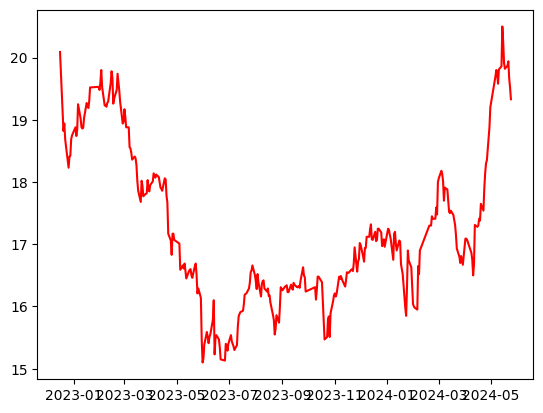

In [89]:
import matplotlib.pyplot as plt
df_time = df.index[-len(y_test):]

print(df.tail(10))
print("y_test 长度:", len(y_test))
print("df_time 取值范围:", df_time.min(), "到", df_time.max())

plt.plot(df_time,y_test,color='red',label='price')
#plt.plot(df_time,pre,color='green',label='predict')
plt.show()